# Observations

* Based on the data we see that most of the drivers, rides and revenue are from Urban cities.  
* However the average fare per ride in Rural and Suburban is higher than Urban rides.
    * This may be due to demand or perhaps ride distance - we cannot determine this with the existing data.
* The ride count by month in each city type is trending slightly upward until May.
    * This data only represents data from January 2018 to May 2018.
        * This contradicts what the starter tells us.  The starter says this is 2016 data.  Based on the date analysis I 
            am not sure if the 2016 data supplied in the starter is correct or if the 2018 dates in the feed represent the 
            actual ride datetime of the ride.
    * The May 2018 dataset is partial month data (first 8 days for urban, 7 days for suburban and rural) and should be excluded 
        from the monthly trending data.  
    * The amount of data is really too little to perform monthly trend projections. 
        * Typically you would want 13 or 25 months of data to really show date trends such as seasonal/monthly impact.  
* Looking at the Day of week of the ride provides an interesting insight
    * Rural rides peak on Sunday with Monday and Tuesday also being elevated
    * Suburban rides peak on Monday with the rest of the week being about the same
    * Urban rides peak on Wednesday with Tueday and Thursday being the next closest days
* Looking at the hourly breakdown of the day of week analysis yielded unexpected results
    * There is no real consistency from day to day regardless of city type
        * Urban Saturday has most rides during 11pm (23), Sunday during noon (12), Thursday during 4am (4)
    * It is hard to determine at this level if the timestamps are using UTC or local to driver times
    * It is also not possible to determine what this timestamp represents
        * It could be the start time, end time, when the ride was ordered, when the data was fed into the system,
            randomly created data etc.
    
# Concerns

* This data forces you to assume the number of drivers is static over time by city.
* Gaining access to start and end location, ride duration, ride milage wouold help make this analysis more comprehensive
* Nothing tells the definition of city type or what the date represents
* The date column could be important depending on what business questions you are trying to answer
    * If the date is local to the driver then the data can be used to help predict local ride demand
    * If the date is UTC then the data can be used to help predict global metrics
        * Example if you needed to use this data to project staffing headcount for a support staff that supported all
            drivers you would wnat the datetimes converted to the times used by your support center


In [32]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data, city_data, on="city", how="outer")

# Convert the date column to a datetime data type for date trend analysis
city_ride_data['date'] = pd.to_datetime(city_ride_data['date'])

# Display the data table for preview
city_ride_data.head()

# create color and type lists that will be used to ensure consistency of chart colors throughout the assignment
colors = ["coral", "lightskyblue", "green"]
types = ["Urban", "Suburban", "Rural"]



## Bubble Plot of Ride Sharing Data

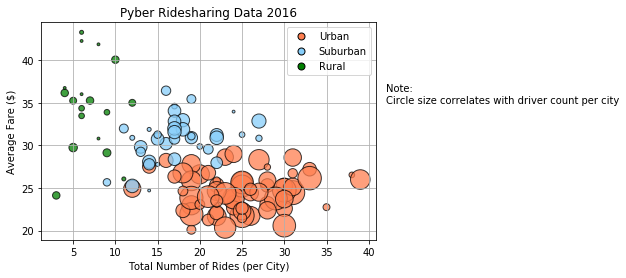

In [33]:
# Obtain the x and y coordinates for each of the three city types
# Key values are ride counts, average fare, driver count and city type
# since the scatter is based on city build a group by based on city
city_groupby = city_ride_data.groupby(['city'])

# build a new baseline data frame with the unique city, type and driver count
city_summary_df = city_ride_data.drop_duplicates(['city','type','driver_count'])[['city','type','driver_count']]


# set the index in city_summary_df to the city so the group by calculations can be merged into the data frame
city_summary_df.set_index('city', inplace = True) 

# add the ride count to the data frame
city_summary_df['ride count'] = city_groupby['ride_id'].count()

# add the average city ride fare to the frame 
city_summary_df['average fare'] = city_groupby['fare'].mean()

# create a color column for the scatter chart
city_summary_df['color'] = city_summary_df['type'].apply(lambda x: colors[types.index(x)])

# Build the scatter plots for each city types
plt.scatter(city_summary_df['ride count'], city_summary_df['average fare'], marker="o",
                color=city_summary_df['color'], s=city_summary_df['driver_count']*8,
                label=city_summary_df['type'], edgecolors="black", alpha=0.75)

# Add a title
plt.title('Pyber Ridesharing Data 2016')

# Add label axes Labels 
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')

# Include a note explaining how circle size is relavant 
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city')


# add a grid
plt.grid()

# Create a legend
legendbox = [ plt.plot([],[], marker="o", markersize=7, linestyle="", markeredgecolor='black', 
                     color=colors[i], label="{:s}".format(types[i]) )[0]  for i in range(len(types)) ]
plt.legend(handles=legendbox, loc=1)


# Save Figure

plt.savefig("../Images/CitySummary.png", bbox_inches='tight')


## Total Fares by City Type

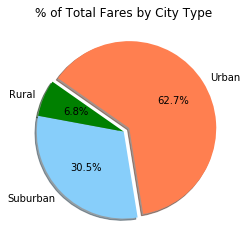

In [34]:
# Calculate Type Percents

type_groupby = city_ride_data.groupby(['type'])

totalfares = city_ride_data['fare'].sum()

type_summary_df = city_ride_data.drop_duplicates(['type'])[['type']]
type_summary_df.set_index('type', inplace = True) 

type_summary_df['Total Fare'] = type_groupby['fare'].sum()
type_summary_df['Type Fare Percent'] = type_groupby['fare'].sum()/totalfares*100


# Build Pie Chart

explode = (0.075, 0, 0)


plt.pie(type_summary_df['Type Fare Percent'], explode=explode, labels=types, colors=colors,
       autopct='%1.1f%%', startangle=145, counterclock=False, shadow=True)

plt.title('% of Total Fares by City Type')

# Save Figure

plt.savefig("../Images/TypeFareSummary.png", bbox_inches='tight')


## Total Rides by City Type

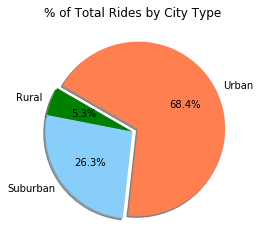

In [35]:
# Calculate Ride Percents
type_summary_df['Total Rides'] = type_groupby['ride_id'].count()

totalrides = city_ride_data['ride_id'].count()

type_summary_df['Type Ride Percent'] = type_groupby['ride_id'].count()/totalrides*100


# Build Pie Chart

plt.pie(type_summary_df['Type Ride Percent'], explode=explode, labels=types, colors=colors,
       autopct='%1.1f%%', startangle=150, counterclock=False, shadow=True)

plt.title('% of Total Rides by City Type')

# Save Figure

plt.savefig("../Images/TypeRideSummary.png", bbox_inches='tight')


## Total Drivers by City Type

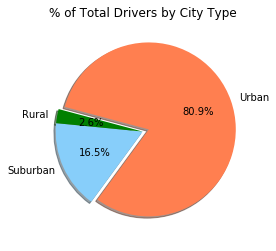

In [36]:
# Calculate Driver Percents

type_drive_groupby = city_data.groupby(['type'])

totaldrivers = city_data['driver_count'].sum()

type_summary_df['Total Drivers'] = type_drive_groupby['driver_count'].sum()
type_summary_df['Type Driver Percent'] = type_drive_groupby['driver_count'].sum()/totaldrivers*100

type_summary_df

# Build Pie Charts

plt.pie(type_summary_df['Type Driver Percent'], explode=explode, labels=types, colors=colors,
       autopct='%1.1f%%', startangle=165, counterclock=False, shadow=True)

plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/TypeDriverSummary.png", bbox_inches='tight')

# Month analysis

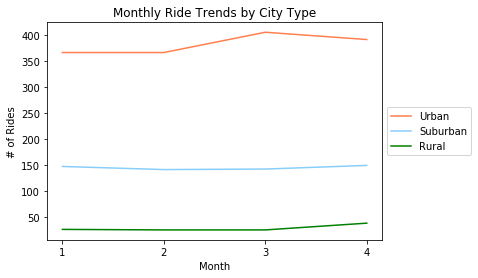

In [37]:
# Create three new columns, one for day, month and year
city_ride_data['year'] = pd.DatetimeIndex(city_ride_data['date']).year
city_ride_data['month'] = pd.DatetimeIndex(city_ride_data['date']).month
city_ride_data['day'] = pd.DatetimeIndex(city_ride_data['date']).day

# Determine how many unique years are in theh data set to determine if year should be part of the summary
# This data set only has data from 2018 so there is no reason to perform any grouping based on year.
# Create a summary based on type and month to enable a monthly treand analysis
month_summary_df = city_ride_data.drop_duplicates(['type','month'])[['type','month']]
month_summary_df.set_index(['type','month'], inplace = True) 

month_type_groupby = city_ride_data.groupby(['type','month'])

# add monthly ride counts
month_summary_df['ride_count'] = month_type_groupby['ride_id'].count()

# since we are trying to find monthly trends we need to check to see if each month is fully represented
# Reviewing the data shows May is an incomplete month. Urban cities have data for the first 8 days of May. 
# Suburban and Rural have 7 days
# We need to remove the May data from the dataframe so it does not skew the trending
# clear the index and filter out the May data then sort the values
month_summary_df = month_summary_df.reset_index()
month_summary_df = month_summary_df[month_summary_df.month != 5]
month_summary_df = month_summary_df.sort_values(['type', 'month'])

# create data frames by city type and use the df to plot a line chart showing the ride count by type 
for ctype in types:
    # create a data frame based on the city type 
    type_month_summary_df = month_summary_df[month_summary_df.type==ctype]
    # define each city's day bar chart
    plt.plot(type_month_summary_df['month'], type_month_summary_df['ride_count'], color=colors[types.index(ctype)],
             label=ctype)

# set the ticks to increment by 1
plt.xticks(np.arange(min(urban_month_summary_df['month']), max(urban_month_summary_df['month'])+1, 1.0))

# add a title
plt.title('Monthly Ride Trends by City Type')

# add the x and y labels
plt.xlabel('Month')
plt.ylabel('# of Rides')

# add a legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save Figure
plt.savefig("../Images/CityTypeRideTrends.png", bbox_inches='tight')


# Day of Week Analysis

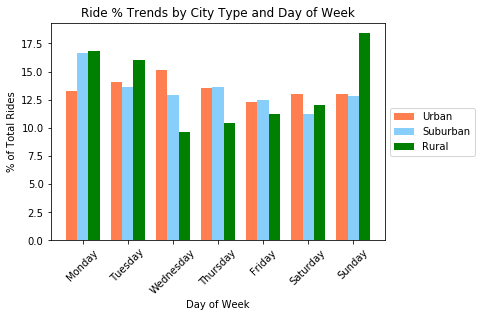

In [48]:
# Since this is a business that would be impacted by weekday/weekend trends it would be interesting to understand the ride demand
# based on the day of week

# Add a new column to our master data frame that contains the day of week
city_ride_data['dayofweek'] = pd.DatetimeIndex(city_ride_data['date']).dayofweek

city_ride_data_no_may = city_ride_data[city_ride_data.month != 5]


#create a dayofweek summary data frame and set the index to allow a groupby dataframe data to be added
dayofweek_summary_df = city_ride_data_no_may.drop_duplicates(['type','dayofweek'])[['type','dayofweek']]
dayofweek_summary_df.set_index(['type','dayofweek'], inplace = True) 

#create a dayofweek groupby from the dataframe that excludes the May data
dayofweek_groupby = city_ride_data_no_may.groupby(['type','dayofweek'])

# Calculate the ride count based on day of week
dayofweek_summary_df['ride_count'] = dayofweek_groupby['ride_id'].count()
dayofweek_summary_df['totalfare'] = dayofweek_groupby['fare'].sum()

# Add a ride count percent calculation to show which days are the top by city type 
dayofweek_summary_df['dayridepercent'] = dayofweek_summary_df['ride_count']/type_summary_df['Total Rides']*100

#remove the index to enable charting
dayofweek_summary_df = dayofweek_summary_df.reset_index()
dayofweek_summary_df = dayofweek_summary_df.sort_values(['type','dayofweek'])

# create a day of week bar for each city type using a side by side bar chart style
# define the day of week labels
daylabels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# set the bar width
width = 0.35

fig = plt.figure()
ax = fig.add_subplot(111)


for ctype in types:
    # create a data frame based on the city type 
    type_dayofweek_summary_df = dayofweek_summary_df[dayofweek_summary_df.type==ctype]
    # define each city's day bar chart and set the spacing to ensure each of the three days bars are together and 
    # the days are clearly seperated
    plt.bar(type_dayofweek_summary_df['dayofweek']+.1 - (types.index(ctype)*(.1 - width)), 
            type_dayofweek_summary_df['dayridepercent'], width-.1, 
            color=colors[types.index(ctype)], label=ctype)

# define the xticks and center the label in the middle of the side by side bars
tick_locations = [value for value in type_dayofweek_summary_df['dayofweek']]
plt.xticks(tick_locations, daylabels, rotation=45)
ax.set_xticks( type_dayofweek_summary_df['dayofweek'] + width)

# add a title
plt.title('Ride % Trends by City Type and Day of Week')

# add the x and y labels
plt.xlabel('Day of Week')
plt.ylabel('% of Total Rides')

# add a legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save Figure
plt.savefig("../Images/DayofWeekRideTrends.png", bbox_inches='tight')


# Hour of the Day Anaysis

In [49]:
# Now we want to add the hour of the day to our analysis 
# add an hour column to the data frame that excludes the May data
city_ride_data['hour'] = pd.DatetimeIndex(city_ride_data['date']).hour

# I tried to do this much earlier in the code so I would not need to reapply this filter multiple times but when I ran the 
# code it gave me a "SettingWithCopyWarning" error that I could not resolve.
city_ride_data_no_may = city_ride_data[city_ride_data.month != 5]

hourofday_summary_df = city_ride_data_no_may.drop_duplicates(['type','dayofweek','hour'])[['type','dayofweek','hour']]


hourofday_summary_df = pd.merge(hourofday_summary_df,
                  dayofweek_summary_df[['type','dayofweek', 'ride_count', 'totalfare']],
                  on=['type','dayofweek'],
                  how='left')

hourofday_summary_df.set_index(['type','dayofweek','hour'], inplace = True) 

#create a dayofweek groupby from the dataframe that excludes the May data
hourofday_groupby = city_ride_data_no_may.groupby(['type','dayofweek','hour'])

# Calculate the ride count based on day of week
hourofday_summary_df['hourlyride_count'] = hourofday_groupby['ride_id'].count()
hourofday_summary_df['hourlyfare'] = hourofday_groupby['fare'].sum()


# Add a ride count percent calculation to show which days are the top by city type 
hourofday_summary_df['hourridepercent'] = hourofday_summary_df['hourlyride_count']/hourofday_summary_df['ride_count']*100

#remove the index to enable charting
hourofday_summary_df = hourofday_summary_df.reset_index()
hourofday_summary_df = hourofday_summary_df.sort_values(['type','dayofweek','hour'])

# Create a hourly ride count chart for each day for each citytype - 21 charts in total
# Since we are not comparing city types and our goal is to see if there are any day specific patterns it is easier to 
# visualize the data by day using the raw ride count. Percentage is useful when comparing the different city types.
# If I were building a presentation with this data I would group the charts based on the patterns identified.
for ctype in types:
    for dayname in daylabels:
        # create a data frame based on the city type 
        type_hourofday_summary_df = hourofday_summary_df[hourofday_summary_df.type==ctype]
        # create a data frame based on the city type day
        chartday_hourofday_summary_df = type_hourofday_summary_df[type_hourofday_summary_df.dayofweek==daylabels.index(dayname)]
        # define each city's day bar chart
        plt.bar(chartday_hourofday_summary_df['hour'], chartday_hourofday_summary_df['hourlyride_count'], width, 
                color=colors[types.index(ctype)])
        
        # create the file name, and path.  Each city type will have a unique directory        
        fullpath = "../Images/" + ctype +"/"
        filename =  ctype + "_" + dayname +  "_HourlyRideTrends.png"    
        
        # set the xticks to label all hours and put it on a 70 rotation
        plt.xticks(chartday_hourofday_summary_df['hour'], rotation=70)
        
        # add a title using the city type and day
        plt.title(ctype + ' Ride Trends by Hour on ' + dayname)

        # add the x and y labels
        plt.xlabel('Hour of Day')
        plt.ylabel('Ride Count')

        # save the figure
        plt.savefig(fullpath + filename, bbox_inches='tight')
        
        # clear the the plot space to prevent the plot area from accumulating data while looping
        plt.gcf().clear()




<Figure size 432x288 with 0 Axes>